In [173]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form style="text-align:right;"action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



#Monte-Carlo Integration#

So far, we have learned multiple ways to both approximate and evaluate definite integrals. The most ubiquitous of these methods, called the **Riemann Sum**, estimates the bounded area of a curve $f(x)$ by adding together a sequence of rectangles with width $\Delta x$ and height $f(x)$ 

###$$ \sum f(x)\, \Delta x$$###

By increasing the number of these rectangles while proportionally shrinking their width, 

Developed as a tool for particle simulation during the Manhattan Project, the Monte-Carlo method relies on (pseudo) random number generation to efficiently approximate numerical values of difficult integrals and other tricky mathematical problems. The name "Monte-Carlo", also the codename for the project, was inspired by the Polish mathemetician Stanislaw Ulam whose uncle would gamble away his relatives money at the casino in Monte-Carlo. Unlike Ulam's uncle, however, the Monte-Carlo method has a far greater success rate.

The theory behind the Monte-Carlo method, and more specifically Monte-Carlo integration, can be likened to a game of darts. Imagine a dartboard with an area $A'$ and a curve $C$ of area $A$ within our dartboard:

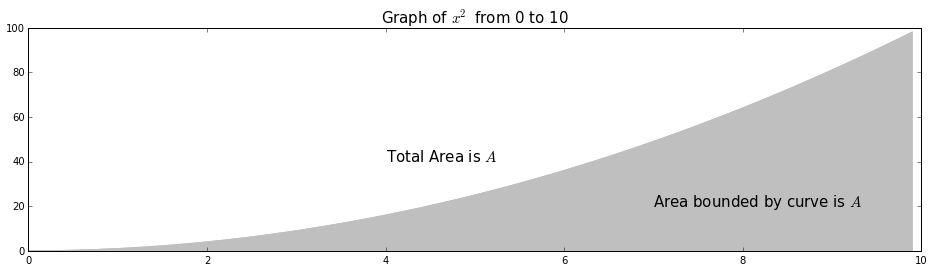

In [10]:
%matplotlib inline
from __future__ import division
import random as rand
import math
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

title_font = 15

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(111)
x = np.arange(0, 10, 0.1);
y = np.power(x, 2)
ax1.set_title("Graph of $x^2$ from 0 to 10", fontsize=title_font)
plt.annotate('Area bounded by curve is $A$ ', xy=(7, 20), fontsize=title_font)
plt.annotate('Total Area is $A$', xy=(4, 40), fontsize=title_font)
plt.fill_between(x, y, 0, color='0.75')
plt.plot(x, y, color='0.75')

Now let us take a handful of "darts" and throw them at this dartboard. If these darts land randomly on the board, the ratio of the number of darts that land within the bounds of the curve to the total number of darts should nearly be equivalent to the ratio of the area bounded by curve and the total area of the board. Where $N$ is number of darts bounded by the curve and $N'$ the total number of darts,

###$$ \frac{A}{A'} = \frac{N}{N'}$$###

So we can find the area bounded by the curve that intersects the dartboard by solving for $A$:

###$$ A = \frac{N}{N'}A'$$###

In [8]:


def monte_carlo(function, darts, start, end, subplot):
	runs = darts
	points = []

	# base of A' from a -> b
	a = start
	b = end


	# height of enclosed box base -> height
	height = function(b)

	for i in range(runs):
		x = a  + rand.random() * (b-a)
		y = rand.random() * height
		if y < function(x):
			points.append([x,y,True])
		else:
			points.append([x,y,False])

	area = 0
	area_prime = b * height
	points_within = 0
	points_outside = 0

	for i in points:
		if i[2]:
			points_within += 1
		elif not i[2]:
			points_outside += 1
# 	print "Points bounded ",points_within 
# 	print "Points outside ",points_outside
        

	area = (Decimal(points_within) / Decimal(points_outside + points_within)) * Decimal(area_prime)

	x_points_in = []
	y_points_in = []

	x_points_out = []
	y_points_out = []

	for i in points:
		if i[2]:
			x_points_in.append(i[0])
			y_points_in.append(i[1])
		elif not i[2]:
			x_points_out.append(i[0])
			y_points_out.append(i[1])
        subplot.set_title("Estimated Integration: " +  str(area))
#         subplot.set_ylabel('f(x)')
#         subplot.set_xlabel("x")
	subplot.plot(x_points_in , y_points_in , 'ro' )
	subplot.plot(x_points_out , y_points_out , 'g^' )
	



squared = lambda x: x**2



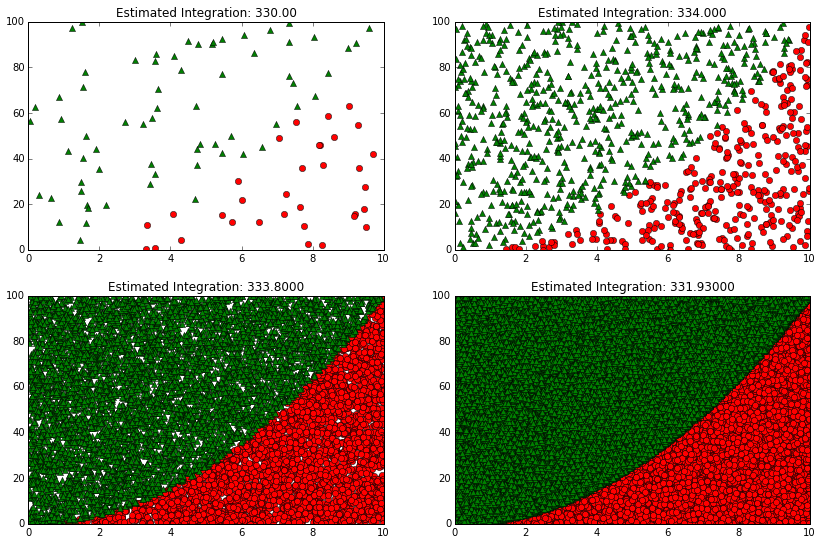

In [17]:
fig = plt.figure(figsize=(14,9))

# graph 1
ax1 = fig.add_subplot(221)
monte_carlo(squared, 100, 0, 10, ax1)

#graph 2
ax2 = fig.add_subplot(222)
monte_carlo(squared, 1000, 0, 10, ax2)

#graph 3
ax2 = fig.add_subplot(223)
monte_carlo(squared, 10000, 0, 10, ax2)

#graph 4
ax2 = fig.add_subplot(224)
monte_carlo(squared, 100000, 0, 10, ax2)



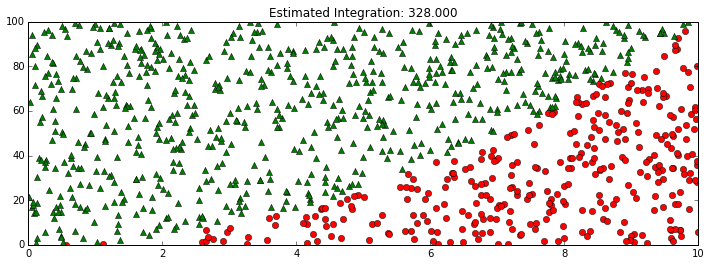

In [16]:
fig = plt.figure(figsize=(12,4))

# graph 1
ax1 = fig.add_subplot(111)
monte_carlo(squared, 1000, 0, 10, ax1)